In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import string

In [2]:
import opendatasets as od 
od.download("https://www.kaggle.com/datasets/kartik2112/fraud-detection/data?select=fraudTrain.csv")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: manmohanmanitripathi
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection


100%|████████████████████████████████████████| 202M/202M [00:15<00:00, 13.3MB/s]


In [3]:
test_df = pd.read_csv("./fraud-detection/fraudTest.csv")
train_df = pd.read_csv("./fraud-detection/fraudTrain.csv")

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


<AxesSubplot:xlabel='is_fraud'>

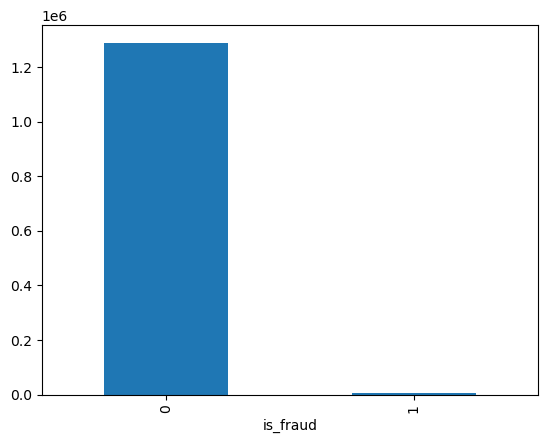

In [9]:
train_df.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [12]:
fraud = train_df[train_df["is_fraud"]==1]
not_fraud = train_df[train_df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

7506
1289169


In [13]:
not_fraud = not_fraud.sample(fraud.shape[0],random_state=42)
new_train = pd.concat([fraud,not_fraud])

In [14]:
new_train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1


<AxesSubplot:xlabel='is_fraud'>

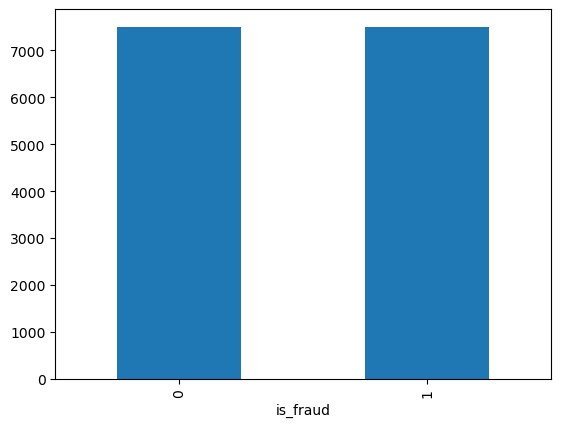

In [15]:
new_train.groupby("is_fraud").count()["cc_num"].plot(kind = "bar")

In [16]:
useless_cols = [
    'Unnamed: 0',
    'merchant',
    'cc_num',
    'first',
    'zip',
    'last',
    'trans_num',
    'unix_time',
    'street',
    'merch_lat',
    'gender',
    'merch_long',
    'job'
]

# Dropping the columns
new_train.drop(columns=useless_cols, inplace=True)

In [17]:
new_train.isna().sum().sum()


0

In [18]:
new_train.duplicated().sum()

0

In [19]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 2449 to 566921
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  15012 non-null  object 
 1   category               15012 non-null  object 
 2   amt                    15012 non-null  float64
 3   city                   15012 non-null  object 
 4   state                  15012 non-null  object 
 5   lat                    15012 non-null  float64
 6   long                   15012 non-null  float64
 7   city_pop               15012 non-null  int64  
 8   dob                    15012 non-null  object 
 9   is_fraud               15012 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 1.3+ MB


In [21]:
new_train['dob']=pd.to_datetime(new_train['dob'])
new_train['trans_date_trans_time']= pd.to_datetime(new_train['trans_date_trans_time'])

In [22]:
from datetime import datetime
new_train["dob"] = new_train["dob"].dt.year
new_train['dob'] = datetime.now().year - new_train['dob']
new_train = new_train.rename(columns = {"dob" : "age"})
new_train


,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,age,is_fraud
2449,2019-01-02 01:06:37,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1
2472,2019-01-02 01:47:29,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2523,2019-01-02 03:05:23,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1
2546,2019-01-02 03:38:03,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1
2553,2019-01-02 03:55:47,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1
...,...,...,...,...,...,...,...,...,...,...
477760,2019-07-28 19:07:55,personal_care,74.48,Tower Hill,IL,39.3900,-88.9597,1532,44,0
1215574,2020-05-23 22:31:58,food_dining,62.22,Oak Hill,NY,42.4069,-74.1528,277,53,0
437865,2019-07-14 16:12:49,personal_care,49.65,Harrington Park,NJ,40.9918,-73.9800,4664,59,0
1047310,2020-03-10 05:59:33,shopping_net,3.62,Camden,TX,30.9000,-94.7547,99,59,0


In [28]:
new_train.drop(columns=["trans_date_trans_time"], inplace=True)

In [29]:
train_df['trans_date_trans_time']= pd.to_datetime(train_df['trans_date_trans_time'])
train_df['trans_date_trans_time']=train_df['trans_date_trans_time'].dt.hour
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
new_train['Session']= train_df['trans_date_trans_time'].apply(f)

In [30]:
new_train.head()

,category,amt,city,state,lat,long,city_pop,age,is_fraud,Session
2449,grocery_pos,281.06,Collettsville,NC,35.9946,-81.7266,885,36,1,Late Night
2472,gas_transport,11.52,San Antonio,TX,29.4400,-98.4590,1595797,64,1,Late Night
2523,grocery_pos,276.31,San Antonio,TX,29.4400,-98.4590,1595797,64,1,Late Night
2546,gas_transport,7.03,Collettsville,NC,35.9946,-81.7266,885,36,1,Late Night
2553,grocery_pos,275.73,San Antonio,TX,29.4400,-98.4590,1595797,64,1,Late Night


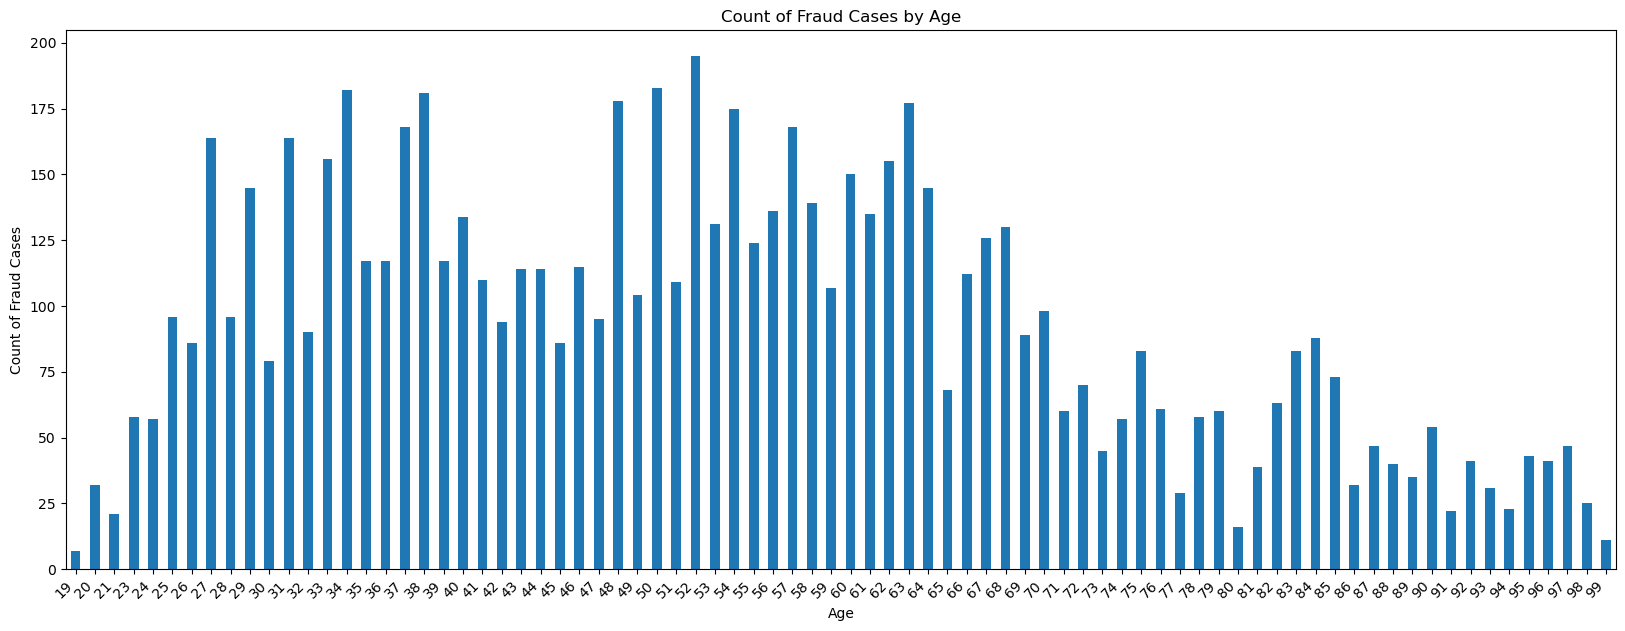

In [31]:
plt.figure(figsize=(20, 7))
ax = new_train[new_train['is_fraud'] == 1].groupby('age').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Age')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by Age')
plt.xticks(rotation=45, ha='right')
plt.show()

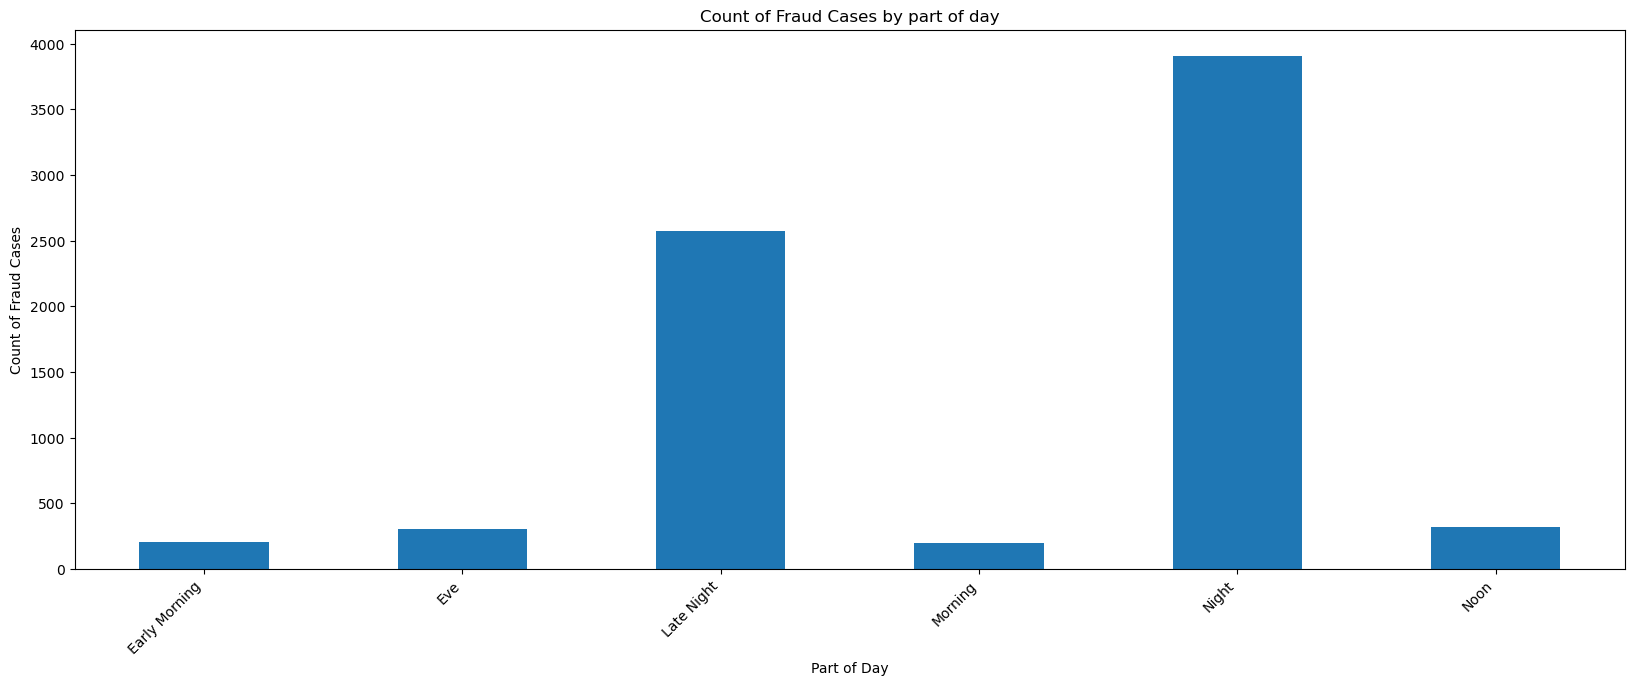

In [32]:
plt.figure(figsize=(20, 7))
ax = new_train[new_train['is_fraud'] == 1].groupby('Session').count()['is_fraud'].plot(kind='bar')
ax.set_xlabel('Part of Day')
ax.set_ylabel('Count of Fraud Cases')
ax.set_title('Count of Fraud Cases by part of day')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
numeric_columns = [i for i in new_train.columns if new_train[i].dtype == 'int64' or new_train[i].dtype =='int32' or new_train[i].dtype =='float64']
categorical_columns = [i for i in new_train.columns if new_train[i].dtype == 'object']

In [36]:
print(numeric_columns)
print(categorical_columns)

['amt', 'lat', 'long', 'city_pop', 'age', 'is_fraud']
['category', 'city', 'state', 'Session']


In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = LabelEncoder()
for col in categorical_columns:
    new_train[col] = encoder.fit_transform(new_train[col])
new_train

,category,amt,city,state,lat,long,city_pop,age,is_fraud,Session
2449,4,281.06,165,27,35.9946,-81.7266,885,36,1,2
2472,2,11.52,721,43,29.4400,-98.4590,1595797,64,1,2
2523,4,276.31,721,43,29.4400,-98.4590,1595797,64,1,2
2546,2,7.03,165,27,35.9946,-81.7266,885,36,1,2
2553,4,275.73,721,43,29.4400,-98.4590,1595797,64,1,2
...,...,...,...,...,...,...,...,...,...,...
477760,10,74.48,803,14,39.3900,-88.9597,1532,44,0,1
1215574,1,62.22,592,34,42.4069,-74.1528,277,53,0,4
437865,10,49.65,326,31,40.9918,-73.9800,4664,59,0,5
1047310,11,3.62,118,43,30.9000,-94.7547,99,59,0,0


In [39]:
columns = new_train.columns.tolist() 
columns.remove('is_fraud')
x_train = new_train.drop(['is_fraud'], axis=1)
y_train = new_train['is_fraud']

scaler = StandardScaler()

x_train[columns] = scaler.fit_transform(x_train[columns])
new_train[x_train.columns] = x_train
new_train

,category,amt,city,state,lat,long,city_pop,age,is_fraud,Session
2449,-0.718863,-0.049366,-1.061220,0.016070,-0.511971,0.606956,-0.295264,-0.904634,1,-0.557103
2472,-1.238025,-0.770247,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1,-0.557103
2523,-0.718863,-0.062070,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1,-0.557103
2546,-1.238025,-0.782256,-1.061220,0.016070,-0.511971,0.606956,-0.295264,-0.904634,1,-0.557103
2553,-0.718863,-0.063621,1.104182,1.127136,-1.790084,-0.581048,4.959033,0.647630,1,-0.557103
...,...,...,...,...,...,...,...,...,...,...
477760,0.838624,-0.601861,1.423540,-0.886671,0.150114,0.093404,-0.293133,-0.461130,0,-1.219801
1215574,-1.497606,-0.634651,0.601778,0.502161,0.738394,1.144698,-0.297267,0.037812,0,0.768291
437865,0.838624,-0.668269,-0.434188,0.293836,0.462457,1.156967,-0.282815,0.370440,0,1.430988
1047310,1.098206,-0.791376,-1.244267,1.127136,-1.505392,-0.318042,-0.297854,0.370440,0,-1.882498


In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
test_df.head()

,trans_date_trans_time,category,amt,city,state,lat,long,city_pop,age,is_fraud,Session
0,12,personal_care,2.86,Columbia,SC,33.9659,-80.9355,333497,56,0,Morning
1,12,personal_care,29.84,Altonah,UT,40.3207,-110.4360,302,34,0,Morning
2,12,health_fitness,41.28,Bellmore,NY,40.6729,-73.5365,34496,54,0,Morning
3,12,misc_pos,60.05,Titusville,FL,28.5697,-80.8191,54767,37,0,Morning
4,12,travel,3.19,Falmouth,MI,44.2529,-85.0170,1126,69,0,Morning


In [ ]:
test_df.drop(columns=useless_cols, inplace=True)
test_df['trans_date_trans_time']= pd.to_datetime(test_df['trans_date_trans_time'])
test_df['trans_date_trans_time']=test_df['trans_date_trans_time'].dt.hour

In [ ]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
test_df['Session']= test_df['trans_date_trans_time'].apply(f)
test_df.drop(columns=["trans_date_trans_time"], inplace=True)

In [47]:
for col in categorical_columns:
    test_df[col] = encoder.fit_transform(test_df[col])
x_test = test_df.drop(['is_fraud'], axis=1)
y_test = test_df['is_fraud']
x_test[columns] = scaler.transform(x_test[columns])
test_df[x_test.columns] = x_test

In [49]:
y_pred=model.predict(x_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.09      0.95      0.16      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.96      0.57    555719
weighted avg       1.00      0.96      0.98    555719



In [51]:
from sklearn.metrics import recall_score,precision_score,f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Acuuracy :",accuracy)
print("Precision :",precision)
print("Recall :",recall)
print("F1_score :",f1)

Acuuracy : 0.9620095767825105
Precision : 0.08862187133995575
Recall : 0.9524475524475524
F1_score : 0.1621557266449718
